Customer segmentation is the practice of dividing customers into groups where the individuals are similar to each other in some ways.

This practice allows a business to create a group-specific campaign or digital advertisement.

It helps businesses to increase the effectiveness of the business's marketing and reducing the marketing costs to almost half.

It also enables businesses to focus marketing activities more on certain platforms based on the characteristics of the segments.

Though it is used to create homogenous groups of individuals, we will use it to understand consumer behavior in this notebook.

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending.

There are diverse product categories, like milk, grocery, region, etc..

To solve this issue they hired a team of the data scientist. Let's say it's you...

In [60]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [61]:
data = pd.read_csv(filepath_or_buffer='https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%206%20ML3/Wholesale_customers_data.csv')
print('shape of dataset', data.shape)
data.head()

shape of dataset (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [62]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [63]:
data['Region'].value_counts()
data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
data['Total spend'] = data['Fresh'] + data['Milk'] + data['Grocery']+ data['Frozen']+ data['Detergents_Paper']+ data['Delicassen']
print(data['Total spend'])

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total spend
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [ ]:
# prompt: Using dataframe data:

import pandas as pd

# Calculate the mean of each column grouped by Channel and Region
data_grouped = data.groupby(['Channel', 'Region']).mean()

# Print the resulting DataFrame
print(data_grouped)


                       Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen   Total spend  
Channel Region                                               
1       1             950.525424  1197.152542  26073.593220  
        2             482.714286  1105.892857  25683.928571  
        3             786.682464  1518.284360  27213.635071  
2       1            8225.277778  1871.944444  47137.277778  
        2            8410.263158  1239.0000

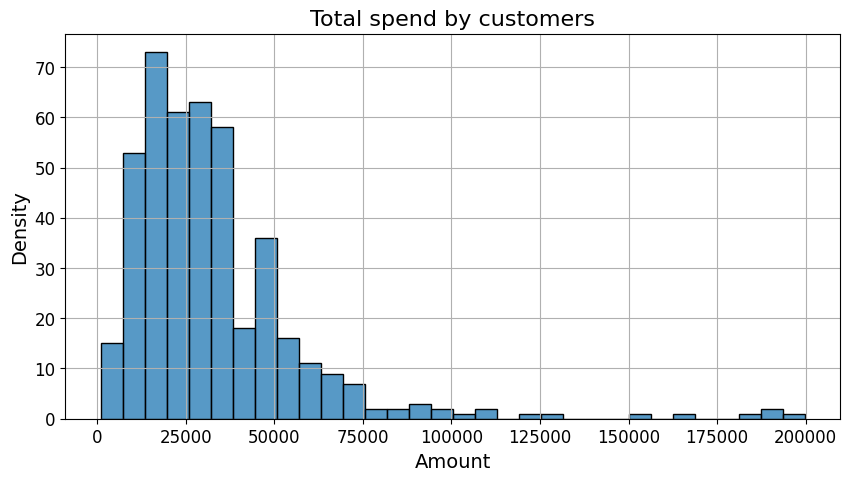

In [ ]:
# Create a figure of 10 x 7 inches
fig = plt.figure(figsize=(10, 5))

# Plot a hist plot on Total spend using sns.histplot
sns.histplot(x = (data['Total spend']))

# Set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.xlabel(xlabel='Amount', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Total spend by customers', size=16)

# Put a grid
plt.grid(True)

# Display the plot
plt.show()

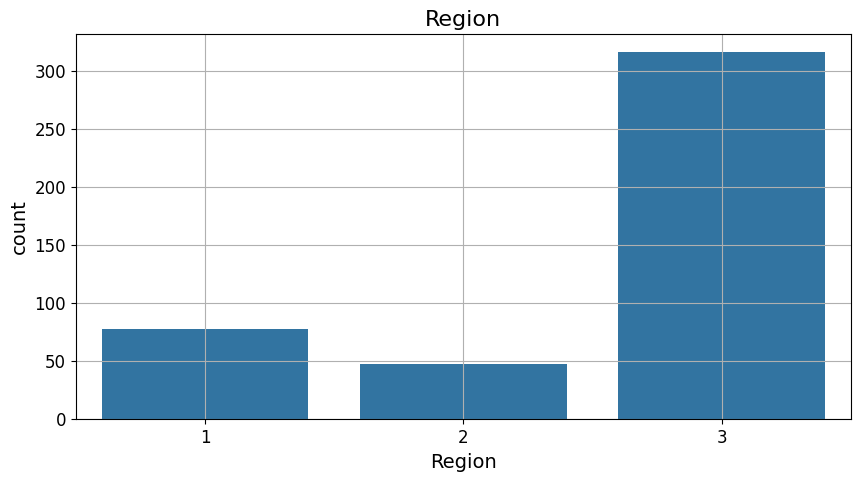

In [ ]:
# Create a figure of 10 x 7 inches
fig = plt.figure(figsize=(10, 5))

# Plot a kde plot on Fresh using sns.histplot
sns.countplot(x = (data['Region']))

# Set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.xlabel(xlabel='Region', size=14)
plt.ylabel(ylabel='count', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Region', size=16)

# Put a grid
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total spend
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

scaled_frame = pd.DataFrame(data=scaled_data, columns=data.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total spend
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011


In [ ]:
# Have some patience, it may take some time :)
inertia_vals = []
K_vals = [x for x in range(1, 16)]

for i in K_vals:
  k_model = KMeans(n_clusters=i, max_iter=500, random_state=42)
  k_model.fit(scaled_frame)
  inertia_vals.append(k_model.inertia_)


In [ ]:
# Visualzing the Inertia vs K Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = K_vals, y = inertia_vals, mode = 'lines+markers'))
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1),
                  title_text = 'Inertia VS K Values',
                  title_x = 0.5,
                  xaxis_title = 'K values',
                  yaxis_title = 'Inertia')
fig.show()

In [58]:
# Perform K-means clustering
k = 7  # number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_frame)

# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [59]:
# Add cluster labels to dataframe
scaled_frame['Cluster'] = labels
cluster_centers= pd.DataFrame(centroids, columns=scaled_frame.columns[:-1])

# Print cluster centers
print("Cluster centers:")
#cluster_centers.head() # Excluding the Cluster column

ValueError: Shape of passed values is (7, 10), indices imply (7, 9)

In [ ]:
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total spend,Cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011,1


In [ ]:
scaled_frame['Cluster'].value_counts()

6    177
3    102
0     86
5     39
2     30
1      5
4      1
Name: Cluster, dtype: int64

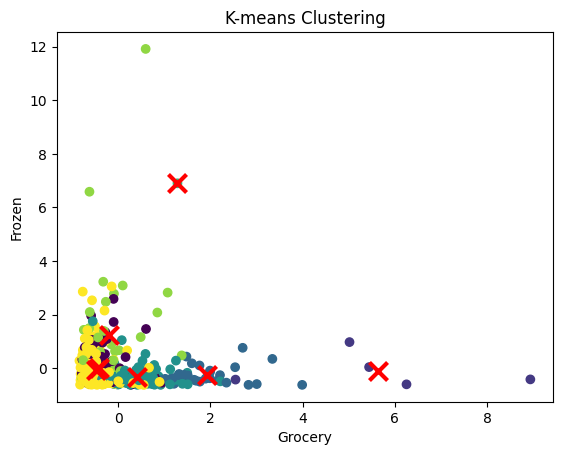

In [ ]:
# Visualize the clusters (for 2D data)
plt.scatter(scaled_frame['Grocery'], scaled_frame['Frozen'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 4], centroids[:, 5], marker='x', s=169, linewidths=3, color='r')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('K-means Clustering')
plt.show()

In [ ]:
scaled_frame= scaled_frame.drop('Cluster', axis=1)

In [ ]:
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total spend
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011


In [ ]:
scaled_frame['Cluster'] = labels
cluster_centers= pd.DataFrame(centroids, columns=scaled_frame.columns[:-1])

# Print cluster centers
print("Cluster centers:")

Cluster centers:


In [ ]:
scaled_frame.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total spend,Cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649,3
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514,3
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535,3
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026,6
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011,3


In [ ]:
scaled_frame['Cluster'].unique()

array([3, 6, 5, 2, 1, 4, 0], dtype=int32)

AttributeError: 'str' object has no attribute 'items'

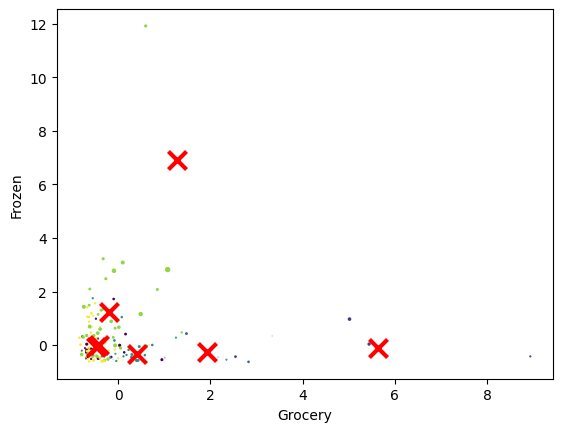

In [57]:
# Visualize the clusters (for 2D data)
plt.scatter(scaled_frame['Grocery'], scaled_frame['Frozen'], scaled_frame['Fresh'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 4], centroids[:, 5], marker='x', s=169, linewidths=3, color='r')
plt.xlabel('Grocery')
plt.ylabel('Frozen', 'Fresh')
plt.title('K-means Clustering')
plt.show()